In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic') # windows
plt.rc('font', family='AppleGothic') # mac
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_pickle('../data/KOSPI_price_2011-2021.pickle')
df = df.loc[:, ["Name", "Date", "Close", "Marcap"]].dropna()
df = df[~df.Name.str.contains("인버스")].reset_index(drop=True)
df = df.set_index("Date")
df.head()

,Name,Close,Marcap
Date,,,
2015-08-21,AJ네트웍스,7100.0,332438294500
2015-08-24,AJ네트웍스,6480.0,303408471600
2015-08-25,AJ네트웍스,6220.0,291234674900
2015-08-26,AJ네트웍스,7090.0,331970071550
2015-08-27,AJ네트웍스,7570.0,354444773150


In [29]:
def get_largest_firms(start_date, end_date, df, n_count=200):
    firm_list = df.loc[start_date:end_date, ["Name", "Marcap"]].groupby("Name").mean().sort_values(by="Marcap", ascending=False).index[:n_count]
    
    return firm_list

firm_list = get_largest_firms("2011-06", "2011-12", df, n_count=50)
firm_list

Index(['삼성전자', '현대차', 'POSCO', '현대모비스', 'LG화학', '신한지주', '삼성생명', 'KB금융',
       'SK이노베이션', '한국전력', 'S-Oil', '삼성전자우', '롯데쇼핑', 'SK텔레콤', '삼성물산', 'LG',
       '삼성화재', 'LG전자', 'KT&G', 'KT', '삼성엔지니어링', '현대제철', '우리금융', '하나금융지주',
       'LG디스플레이', '기업은행', '삼성중공업', '현대건설', '이마트', 'LG생활건강', 'SK', '현대글로비스',
       'OCI', '엔씨소프트', '고려아연', '아모레퍼시픽', '삼성SDI', 'GS', '두산중공업', '삼성전기',
       '강원랜드', '대우조선해양', '삼성카드', '외환은행', '제일모직', 'GS건설', '금호석유', '셀트리온',
       '대우건설', '삼성증권'],
      dtype='object', name='Name')

In [30]:
back_data = df.loc["2011-06":"2011-12"].reset_index().pivot(index="Date", columns="Name", values="Close").loc[:, firm_list]

for i in back_data.columns[back_data.isnull().any(axis=0)]:
    back_data[i].fillna(back_data[i].mean(),inplace=True)

back_data = back_data.pct_change(fill_method ='ffill')

cov_mat = back_data.cov()
cov_mat

Name,삼성전자,현대차,POSCO,현대모비스,LG화학,신한지주,삼성생명,KB금융,SK이노베이션,한국전력,...,강원랜드,대우조선해양,삼성카드,외환은행,제일모직,GS건설,금호석유,셀트리온,대우건설,삼성증권
Name,,,,,,,,,,,,,,,,,,,,,
삼성전자,0.000553,0.000419,0.000334,0.000333,0.000543,0.000391,0.000192,0.000466,0.000537,0.000213,...,0.000193,0.000549,0.000272,0.000231,0.000334,0.000404,0.000397,0.000289,0.000372,4.385509e-04
현대차,0.000419,0.000740,0.000355,0.000674,0.000807,0.000370,0.000173,0.000461,0.000820,0.000166,...,0.000171,0.000783,0.000309,0.000260,0.000487,0.000624,0.000719,0.000396,0.000543,5.610331e-04
POSCO,0.000334,0.000355,0.000470,0.000317,0.000505,0.000408,0.000189,0.000458,0.000535,0.000251,...,0.000194,0.000579,0.000333,0.000296,0.000285,0.000489,0.000444,0.000253,0.000366,4.459296e-04
현대모비스,0.000333,0.000674,0.000317,0.000888,0.000844,0.000417,0.000160,0.000469,0.000854,0.000162,...,0.000148,0.000841,0.000321,0.000240,0.000438,0.000710,0.000796,0.000363,0.000546,5.897287e-04
LG화학,0.000543,0.000807,0.000505,0.000844,0.001578,0.000530,0.000238,0.000678,0.001335,0.000258,...,0.000144,0.001170,0.000459,0.000345,0.000766,0.000896,0.001077,0.000437,0.000764,8.089456e-04
신한지주,0.000391,0.000370,0.000408,0.000417,0.000530,0.000755,0.000230,0.000670,0.000592,0.000298,...,0.000233,0.000668,0.000422,0.000344,0.000347,0.000574,0.000494,0.000318,0.000399,5.253813e-04
삼성생명,0.000192,0.000173,0.000189,0.000160,0.000238,0.000230,0.000264,0.000240,0.000257,0.000143,...,0.000124,0.000321,0.000171,0.000168,0.000138,0.000249,0.000199,0.000176,0.000175,2.311326e-04
KB금융,0.000466,0.000461,0.000458,0.000469,0.000678,0.000670,0.000240,0.000824,0.000661,0.000313,...,0.000267,0.000759,0.000419,0.000353,0.000384,0.000614,0.000560,0.000360,0.000482,6.084398e-04
SK이노베이션,0.000537,0.000820,0.000535,0.000854,0.001335,0.000592,0.000257,0.000661,0.001675,0.000264,...,0.000238,0.001295,0.000433,0.000403,0.000783,0.001022,0.001255,0.000512,0.000762,8.863812e-04


In [31]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

class RiskParity:
    def __init__(self, df):
        self.df = df
        self.firm_list = self.df.columns.values
        self.cov_mat = df.cov().values
        self.std = df.std()
        
        self.initial_weights = np.repeat(1 / self.cov_mat.shape[0], self.cov_mat.shape[0])
        self.constraints = ({"type": "eq", "fun": RiskParity.weight_summation_constraint,
                            "type": "ineq", "fun": RiskParity.weight_bound_constraint})
        self.options = {"ftol": 1e-20, "maxiter": 1000}
        
        
    def optimize(self):
        self.results = minimize(fun=RiskParity.objective_function,
                                x0=self.initial_weights, 
                                method='SLSQP', 
                                constraints=self.constraints,
                                options=self.options,
                                args=self.cov_mat)

        
    @staticmethod
    def objective_function(x, cov_mat):
        variance = x.T @ cov_mat @ x
        sigma = variance ** 0.5
        mrc = 1 / sigma * (cov_mat @ x)
        rc = x * mrc
        a = np.reshape(rc, (len(rc), 1))
        risk_diff = a - a.T
        squared_risk_diff_summation = np.sum(np.square(np.ravel(risk_diff)))

        return squared_risk_diff_summation


    @staticmethod
    def weight_summation_constraint(x):
        return x.sum() - 1.0


    @staticmethod
    def weight_bound_constraint(x):
        return x
    
    
    def plot(self):
        plt.figure(figsize=(15, 10))

        plt.subplot(2,1,1)
        plt.title("포트폴리오 비중")
        plt.bar(self.firm_list, self.results.x)
        
        plt.subplot(2,1,2)
        plt.title("종목 별 변동성")
        plt.bar(self.firm_list, self.std)


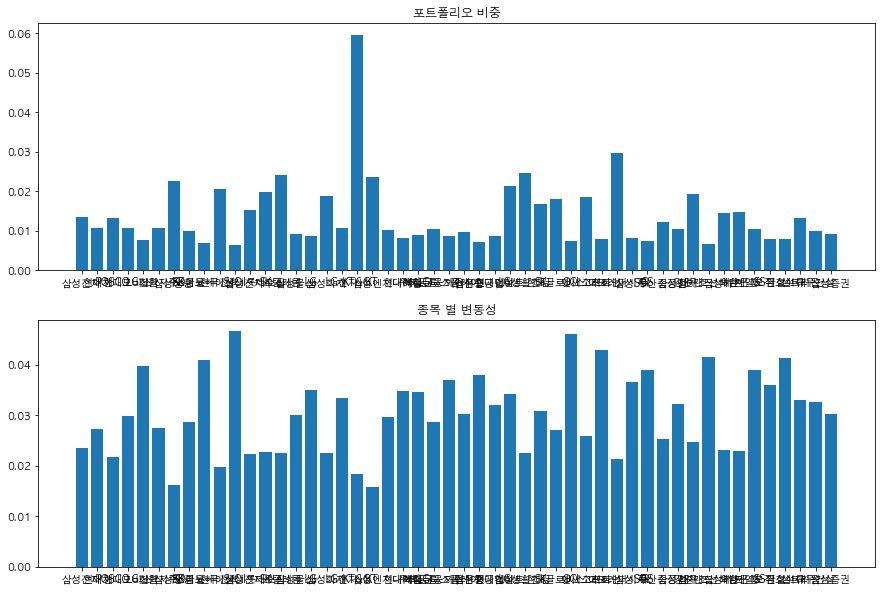

In [32]:
RP = RiskParity(back_data)
RP.optimize()
RP.plot()